In [169]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import datetime as dt

In [3]:
import imxUtilities as utils

In [60]:
pd.options.display.float_format = '{:,}'.format

In [4]:
ticket_data = utils.data.tickets_data()
invoice_data = utils.data.invoice_data()

In [16]:
revenue_df = ticket_data[['date', 'company_name', 'jobsite',\
                              'net_weight', 'hours_worked', \
                              'material_type', 'rate']].copy()
revenue_df['weight_revenue'] = revenue_df['rate']*revenue_df['net_weight']
revenue_df['hourly_revenue'] = revenue_df['rate']*revenue_df['hours_worked']
revenue_df['total_revenue'] = revenue_df['weight_revenue'] + revenue_df['hourly_revenue']
revenue_df['date'] = pd.to_datetime(revenue_df['date'], format='%Y-%m-%d')

In [17]:
revenue_df.head()

,date,company_name,jobsite,net_weight,hours_worked,material_type,rate,weight_revenue,hourly_revenue,total_revenue
0,2022-02-02,JBI Scrap Processors,JBI,25900,0,5_foot_heavy_torching,30,777000,0,777000
1,2022-02-02,JBI Scrap Processors,JBI,28100,0,5_foot_heavy_torching,30,843000,0,843000
2,2022-02-02,JBI Scrap Processors,JBI,40400,0,5_foot_heavy_torching,30,1212000,0,1212000
3,2022-02-02,JBI Scrap Processors,JBI,26800,0,5_foot_heavy_torching,30,804000,0,804000
4,2022-01-19,Cohen Recycling,Sardinia,21440,0,5_foot_heavy_torching,30,643200,0,643200


In [27]:
revenue_df[revenue_df['date'] > '2022-01-01'].head()

,date,company_name,jobsite,net_weight,hours_worked,material_type,rate,weight_revenue,hourly_revenue,total_revenue
0,2022-02-02,JBI Scrap Processors,JBI,25900,0,5_foot_heavy_torching,30,777000,0,777000
1,2022-02-02,JBI Scrap Processors,JBI,28100,0,5_foot_heavy_torching,30,843000,0,843000
2,2022-02-02,JBI Scrap Processors,JBI,40400,0,5_foot_heavy_torching,30,1212000,0,1212000
3,2022-02-02,JBI Scrap Processors,JBI,26800,0,5_foot_heavy_torching,30,804000,0,804000
4,2022-01-19,Cohen Recycling,Sardinia,21440,0,5_foot_heavy_torching,30,643200,0,643200


In [135]:
revenue_df.columns

Index(['date', 'company_name', 'jobsite', 'net_weight', 'hours_worked',
       'material_type', 'rate', 'weight_revenue', 'hourly_revenue',
       'total_revenue'],
      dtype='object')

In [144]:
def revenue_by_month(data_df):
    data_df = data_df[['date', 'total_revenue']]
    current_year = dt.date.today().year
    start_of_year = dt.date(current_year, 1, 1)
    data_df = data_df[data_df.date.dt.date > start_of_year]
    by_month = data_df.groupby(by=data_df.date.dt.month).sum()
    for col in by_month:
        by_month[col] = by_month.apply(lambda x: "{:,}".format(x[col]), axis=1)
    return by_month
    

In [257]:
by_month = revenue_by_month(revenue_df)
#by_month.reset_index(inplace=True)

<AxesSubplot:xlabel='date'>

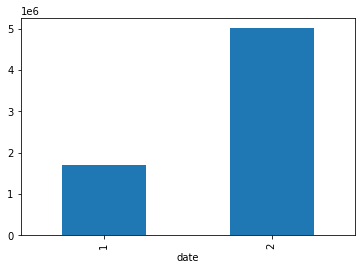

In [265]:
revenue_df.groupby(revenue_df.date.dt.month).sum()['total_revenue'].plot(kind='bar')

In [270]:
by_month = revenue_df.groupby(by=[revenue_df.date.dt.year,revenue_df.date.dt.month ]).sum()

<AxesSubplot:xlabel='date,date'>

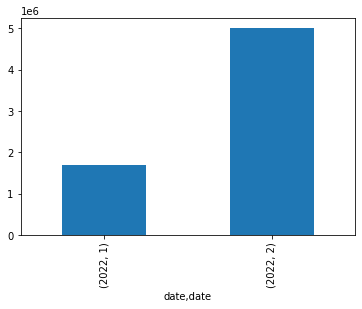

In [277]:
#by_month['total_revenue'].plot.bar()

revenue_df.groupby(by=[revenue_df.date.dt.year,revenue_df.date.dt.month ])['total_revenue'].sum().plot(kind='bar')

In [241]:
by_moth

net_weight  hours_worked  rate  weight_revenue  hourly_revenue  \
date date                                                                   
2022 1          40520             0    85         1692600               0   
     2         148900             0   575         5005500               0   

           total_revenue  
date date                 
2022 1           1692600  
     2           5005500

<AxesSubplot:xlabel='date,date'>

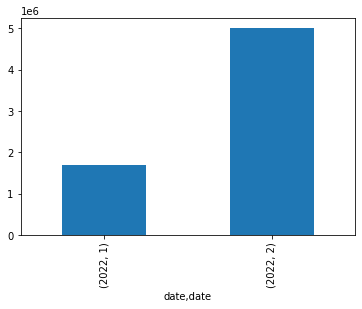

In [274]:
fig, axes = plt.subplots(1,1)
by_month['total_revenue'].plot(kind='bar')